In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
iris_data = pd.read_csv('IRIS.csv')

In [4]:
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,response
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn import datasets
iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [8]:
X = iris.data[:, :-1]  
y = iris.target

In [14]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [12]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [15]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
x = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data[['response']]

In [19]:
from sklearn.cluster import KMeans
km = KMeans(3, random_state=2)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [20]:
centroids = km.cluster_centers_
centroids

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [22]:
iris_data['resp_labels'] = pd.Categorical(iris_data['response']).codes
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,response,resp_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [24]:
iris_data['cluster_pred_labels'] = km.labels_
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,response,resp_labels,cluster_pred_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0,0


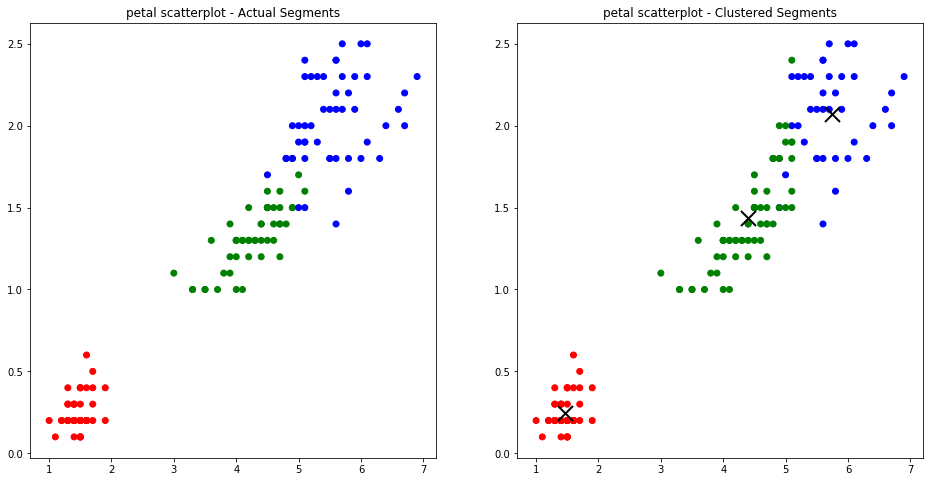

In [25]:
plt.figure(figsize=(16,8))
color_mapping = np.array(['red', 'green', 'blue'])

# scatter plot of petal length vs petal width by using color as response var
plt.subplot(1,2,1)
plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.resp_labels])
plt.title('petal scatterplot - Actual Segments')


# scatter plot of petal length vs petal width by using color as Cluster Labels
plt.subplot(1,2,2)
plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.cluster_pred_labels])
#plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.resp_labels])
plt.title('petal scatterplot - Clustered Segments')

# plot the centriod for k=3 for petals (x,y)
n=3
for i in range(n):
    lines = plt.plot(centroids[i,2],centroids[i,3],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)


In [26]:
metrics.silhouette_score(x, iris_data.cluster_pred_labels, metric='euclidean', sample_size=150)


0.5525919445213676

In [28]:
k_range = range(2,7)
k_range

range(2, 7)

In [31]:
k_fit_vars = [KMeans(n_clusters=k).fit(x) for k in k_range]
k_centroids = [model.cluster_centers_ for model in k_fit_vars]
k_centroids

[array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
        [6.30103093, 2.88659794, 4.95876289, 1.69587629]]),
 array([[5.006     , 3.418     , 1.464     , 0.244     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
        [5.006     , 3.418     , 1.464     , 0.244     ],
        [6.9125    , 3.1       , 5.846875  , 2.13125   ],
        [6.2525    , 2.855     , 4.815     , 1.625     ]]),
 array([[7.475     , 3.125     , 6.3       , 2.05      ],
        [5.006     , 3.418     , 1.464     , 0.244     ],
        [5.508     , 2.6       , 3.908     , 1.204     ],
        [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
        [6.20769231, 2.85384615, 4.74615385, 1.56410256]]),
 array([[5.26538462, 3.68076923, 1.50384615, 0.29230769],
        [6.24722222, 2.84722222, 4.775     , 1.575     ],
        [5.53214286, 2.63571429, 3.96071429, 1.22857143],
      